In [1]:
import torch
from torchvision.transforms import ToTensor, ToPILImage, Resize, Compose
from PIL import Image
import matplotlib.pyplot as plt
import json
import torch.nn as nn
from data_prep import download_and_process_coco
import nbimporter
from DenoiseAutoEncoderV2 import DenoisingAutoencoder

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [4]:
model_path = "./models/DenoiseAutoencoderV4.pth"
model = DenoisingAutoencoder()
model = torch.load(model_path)
model.eval()

C:\Users\benca\AppData\Local\Temp\ipykernel_21852\411452269.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


DenoisingAutoencoder(
  (encoder_conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (encoder_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_relu1): LeakyReLU(negative_slope=0.2)
  (encoder_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (encoder_bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_relu2): LeakyReLU(negative_slope=0.2)
  (encoder_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (encoder_bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (encoder_relu3): LeakyReLU(negative_slope=0.2)
  (dropout): Dropout(p=0.3, inplace=False)
  (channel_attention): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Conv2d(256, 16, kernel_size=(1, 1), stride=(1, 1))
    (2): ReLU()
    (3): Conv2d(16, 256, kernel_size=(1, 1), stride=(1, 1))
    (4): Sigmoid()
  )
  

In [5]:
download_and_process_coco("test", 1)

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!
Processing test images...


In [6]:
VALID_CLEAN_PATH = config["valid_clean_dir"]
VALID_NOISY_PATH = config["valid_noisy_dir"]

PHOTO_ID = str(config["use_model"]["image_id"]) + ".png"

noisy_image_path = "test/noisy/376278.png"
clean_image_path = "test/clean/376278.png"

In [7]:
noisy_image = Image.open(noisy_image_path).convert("RGB")
clean_image = Image.open(clean_image_path).convert("RGB")
transform = Compose([
    Resize((256, 256)),
    ToTensor()
])

noisy_tensor = transform(noisy_image).unsqueeze(0)
clean_tensor = transform(clean_image).unsqueeze(0)

In [8]:
with torch.no_grad():
    denoised_tensor = model(noisy_tensor)

to_pil = ToPILImage()
noisy_image_vis = to_pil(noisy_tensor.squeeze(0))
denoised_image_vis = to_pil(denoised_tensor.squeeze(0))
clean_image_vis = to_pil(clean_tensor.squeeze(0))

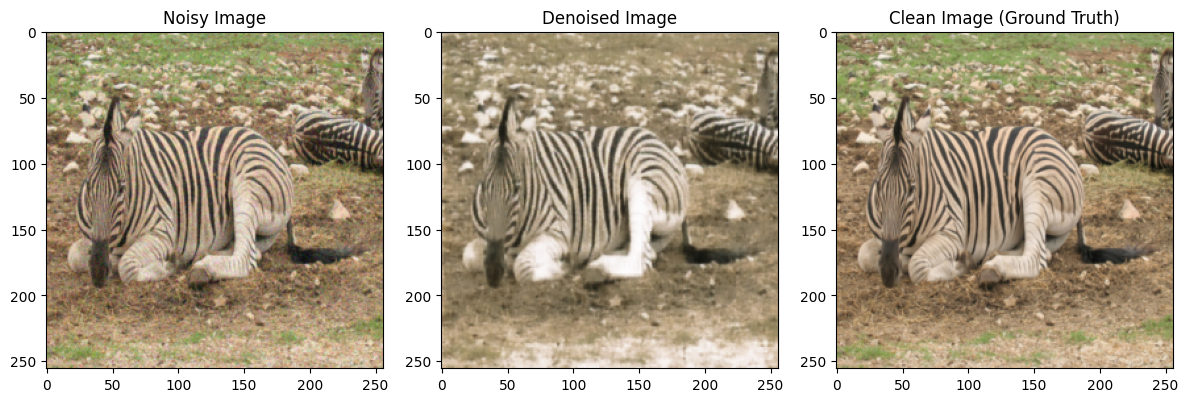

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image_vis)

plt.subplot(1, 3, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image_vis)

plt.subplot(1, 3, 3)
plt.title("Clean Image (Ground Truth)")
plt.imshow(clean_image_vis)

plt.tight_layout()
plt.show()